In [95]:
import sys
import numpy as np

%matplotlib inline
sys.path.append("..")

execfile('../insta/build_map_points.py')
execfile('../insta/blog1.py')


***Jobs Listed***

['Cook', 'Server', 'Manager', 'Host', 'Bartender', 'Dishwasher', 'Runner', 'Counter', 'Barista', 'Busser', 'General', 'Driver', 'Baker', 'Barback']
[1563, 567, 417, 236, 218, 207, 160, 131, 130, 107, 90, 61, 36, 1]


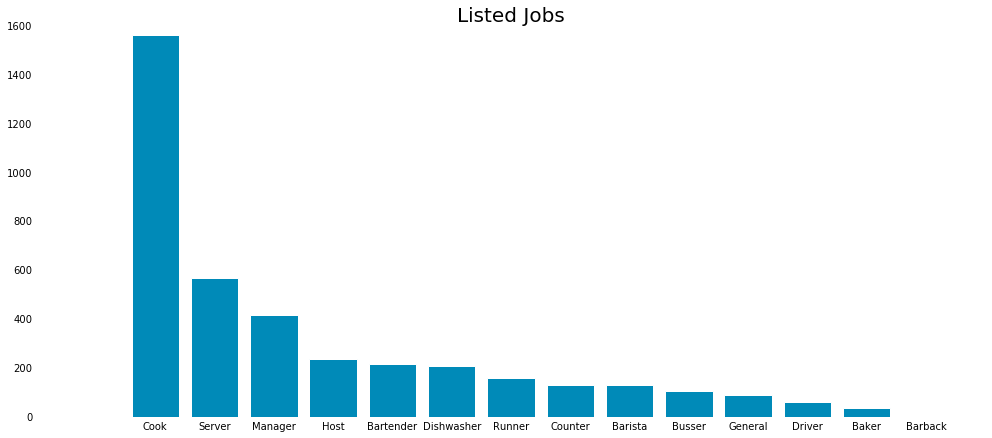

In [101]:
key = 'k_title'
df_histogram = get_histogram_data(df_job, key, 22)

x = list(df_histogram[key])
y = list(df_histogram['_count'])

print x
print y


#----------------------------------------------------------
# Chart
#----------------------------------------------------------
chart_title = 'Listed Jobs'

fig = plt.figure(figsize=(17,7)) # canvas size in inches
ax = fig.add_subplot(111)

ax.set_title(chart_title, fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# axis
ax.get_yaxis().set_visible(True)

# ticks
ax.yaxis.set_ticks_position('none') 
ax.xaxis.set_ticks_position('none') 

#ax.set_xlabel('Job Title', fontsize=16)
#ax.set_ylabel('Count', fontsize=16)
aes = {
    "edgecolor": "#ffffff",
    "color": "#008AB8",
    "align": "center" # edge, center
}

plt.bar(range(len(x)), y, **aes) # align=[edge, center]
plt.xticks(range(len(x)), x)
plt.show()

***Position Applied***

['Cook', 'Server', 'Bartender', 'Host', 'Manager', 'Dishwasher', 'Counter', 'Busser', 'Barista', 'Runner', 'Baker', 'General', 'Driver', 'Barback']
[59185, 54592, 20464, 15039, 13290, 12127, 9567, 9433, 7970, 5088, 3212, 2493, 1513, 40]


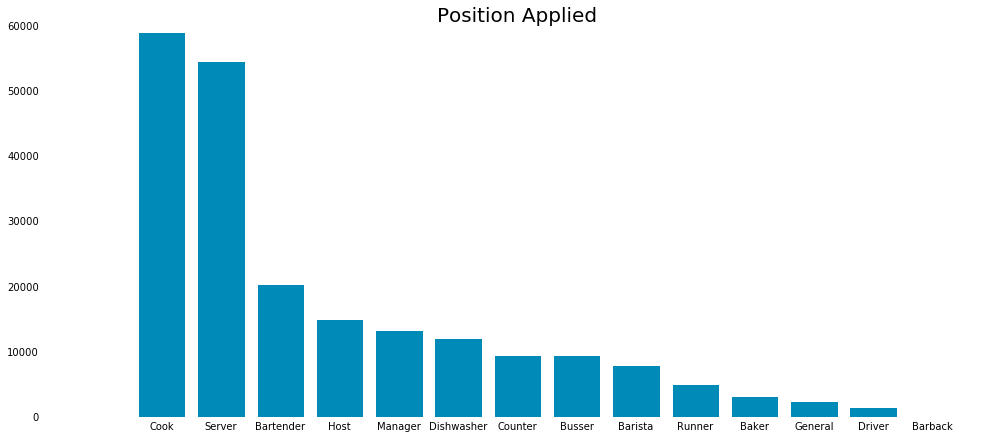

In [98]:
key = 'k_title'
df_histogram = get_histogram_data(df_job_applied, key, 22)

x = list(df_histogram[key])
y = list(df_histogram['_count'])

print x
print y

#----------------------------------------------------------
# Chart
#----------------------------------------------------------
chart_title = 'Position Applied'

fig = plt.figure(figsize=(17,7)) # canvas size in inches
ax = fig.add_subplot(111)

ax.set_title(chart_title, fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# axis
ax.get_yaxis().set_visible(True)

# ticks
ax.yaxis.set_ticks_position('none') 
ax.xaxis.set_ticks_position('none') 

#ax.set_xlabel('Job Title', fontsize=16)
#ax.set_ylabel('Count', fontsize=16)
aes = {
    "edgecolor": "#ffffff",
    "color": "#008AB8",
    "align": "center" # edge, center
}

plt.bar(range(len(x)), y, **aes) # align=[edge, center]
plt.xticks(range(len(x)), x)
plt.show()

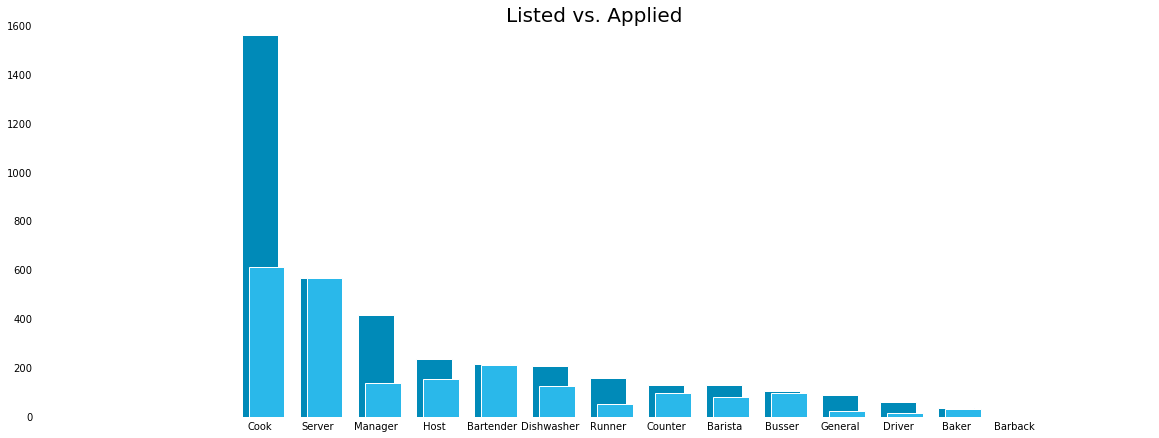

In [159]:
key = 'k_title'
df_histogram_listed = get_histogram_data(df_job, key, 22)
df_histogram_applied = get_histogram_data(df_job_applied, key, 22)

# normalize with respect to server
server_applied_count = int(df_histogram_applied[df_histogram_applied['k_title'] == 'Server']['_count'][0])
server_listed_count = int(df_histogram_listed[df_histogram_listed['k_title'] == 'Server']['_count'][0])
server_scaling_factor = 1.0 * server_listed_count / server_applied_count

def scale_count(row):
    return int(row['_count'] * server_scaling_factor)

df_histogram_applied = add_column(df_histogram_applied, scale_count, '__count')

df1 = df_histogram_listed
df2 = pd.DataFrame(index = df1.index, columns=df1.columns)

for _, row in df_histogram_applied.iterrows():
    title =  row['k_title']
    count = row['__count']
    df2.loc[title, 'k_title'] = title
    df2.loc[title, '_count'] = count

x1 = list(df1[key])
y1 = list(df1['_count'])
x2 = list(df2[key])
y2 = list(df2['_count'])
width = .15
step = 1.3
    
#----------------------------------------------------------
# Chart
#----------------------------------------------------------
chart_title = 'Listed vs. Applied'

fig = plt.figure(figsize=(20,7)) # canvas size in inches
ax = fig.add_subplot(111)

ax.set_title(chart_title, fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# axis
ax.get_yaxis().set_visible(True)

# ticks
ax.yaxis.set_ticks_position('none') 
ax.xaxis.set_ticks_position('none') 

#ax.set_xlabel('Job Title', fontsize=16)
#ax.set_ylabel('Count', fontsize=16)
aes1 = {
    "edgecolor": "#ffffff",
    "color": "#008AB8",
    "align": "center" # edge, center
}
aes2 = {
    "edgecolor": "#ffffff",
    "color": "#2ab8ea",
    "align": "center" # edge, center
}


plt.bar(np.arange(len(x1)*step, step=step), y1, **aes1) # align=[edge, center]
a = plt.bar(np.arange(len(x1)*step, step=step)+width, y2, **aes2) # align=[edge, center]
plt.xticks(np.arange(len(x1)*step, step=step), x1)
plt.show()


    